# Import Libraries

In [1062]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pygad
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [1063]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

# Read the Data From the CSV File

In [1064]:
data1 = pd.read_csv("Bike.csv")
data1

,OBJECTID,demand,Reach,Betweennes,Straightne,Closeness,Gravity,dockNBR,distance_toTransit
0,1,1375,2073361,129469412,1687418151,3.529500e-08,9153.717616,10,0.076558
1,2,1108,2073628,13646904,1657199003,3.800550e-08,9572.866964,15,0.058845
2,3,1376,2073360,15319515,1623843393,3.630850e-08,6849.737211,10,0.099067
3,4,324,2074412,43344732,1684996944,3.832950e-08,10173.065400,15,0.140023
4,5,976,2073760,12253244,1658997517,3.859900e-08,11812.439520,10,0.068515
...,...,...,...,...,...,...,...,...,...
1445,1275,0,2074736,4166620,1606418175,3.203840e-08,20201.330260,7,0.007162
1446,1318,0,2074736,121635,1639397264,4.059860e-08,24515.644270,9,0.116472
1447,1371,0,2074736,23162535,1594545918,4.088070e-08,16868.622910,5,0.076148
1448,1373,0,2074736,69721,1595036395,4.087680e-08,17375.002740,10,0.056724


In [1065]:
data2 = pd.read_csv("Bike_district.csv")
data2

,OBJECTID,EMD_CD,popDong,activepopD,HHI,landindex2,jobs,dockNBR,bikeDema_1,bikestop_1,...,Slope,retailNBR,CarPop,transitdem,distTransi,BstopPop,TrDemPop,biDemPop,bikDem,bikeability_index
0,1,11110101,26628,8803,20119.85617,0.000356,14468,8,1015,1,...,4.846154,50,34.853403,1318171,0.037042,0.000038,49.503192,30212.827530,0.038118,-3784.882153
1,2,11110102,13090,4271,34948.96136,0.003181,6282,0,0,0,...,2.000000,31,36.361111,0,0.000000,0.000000,0.000000,0.000000,0.000000,-11784.285230
2,3,11110103,13090,4271,20027.72690,0.003852,6282,0,0,0,...,1.500000,6,272.708333,230442,0.000000,0.000000,17.604431,0.000000,0.000000,-9582.932771
3,4,11110104,13090,4271,24440.81760,0.004891,6282,20,710,1,...,1.000000,38,62.932692,1220323,0.255136,0.000076,93.225592,3222.046828,0.054240,-224.516682
4,5,11110105,22790,7345,39974.11153,0.005589,55818,0,0,0,...,1.000000,39,165.144927,1463952,0.000000,0.000000,64.236595,0.000000,0.000000,-12414.767440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,463,11740106,117858,40672,19100.36519,0.000109,45736,30,2112,2,...,5.880952,1106,12.351499,5207163,0.069989,0.000017,44.181668,44043.956360,0.017920,253.328550
463,464,11740107,224780,74509,14187.15268,0.000053,58974,101,9299,7,...,4.428571,1898,10.386766,19436034,0.096675,0.000031,86.466919,194029.094800,0.041369,9421.839888
464,465,11740108,224958,79311,40000.00113,0.000170,92025,175,29044,12,...,2.700000,2869,10.008364,66084889,0.074102,0.000053,293.765454,252560.534400,0.129109,22421.697830
465,466,11740109,294636,101113,28182.45620,0.000097,91369,93,14089,7,...,3.333333,3140,10.881412,19044552,0.089404,0.000024,64.637560,146196.925900,0.047818,12674.344060


# Data Preprocessing

In [1066]:
len(data1)

1450

In [1067]:
len(data2)




467

In [1068]:
data1.columns

Index(['OBJECTID', 'demand', 'Reach', 'Betweennes', 'Straightne', 'Closeness',
       'Gravity', 'dockNBR', 'distance_toTransit'],
      dtype='object')

In [1069]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OBJECTID            1450 non-null   int64  
 1   demand              1450 non-null   int64  
 2   Reach               1450 non-null   int64  
 3   Betweennes          1450 non-null   int64  
 4   Straightne          1450 non-null   int64  
 5   Closeness           1450 non-null   float64
 6   Gravity             1450 non-null   float64
 7   dockNBR             1450 non-null   int64  
 8   distance_toTransit  1450 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 102.1 KB


In [1070]:
data1.isnull().sum()

OBJECTID              0
demand                0
Reach                 0
Betweennes            0
Straightne            0
Closeness             0
Gravity               0
dockNBR               0
distance_toTransit    0
dtype: int64

In [1071]:
data1.describe()

,OBJECTID,demand,Reach,Betweennes,Straightne,Closeness,Gravity,dockNBR,distance_toTransit
count,1450.000000,1450.000000,1.450000e+03,1.450000e+03,1.450000e+03,1.450000e+03,1450.000000,1450.000000,1450.000000
mean,726.942759,1433.120690,2.070443e+06,2.051394e+07,1.609130e+09,3.196525e-08,14810.498641,12.539310,0.090597
std,419.670197,1266.915661,7.698440e+04,4.385308e+07,1.084711e+08,5.512069e-09,8042.605666,4.581767,0.153143
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,5.000000,0.000000
25%,363.250000,608.500000,2.072868e+06,0.000000e+00,1.556669e+09,2.753068e-08,9152.387862,10.000000,0.023936
50%,727.500000,1145.500000,2.073590e+06,3.372492e+06,1.621670e+09,3.215120e-08,13194.701915,10.000000,0.055942
75%,1089.750000,1865.250000,2.074128e+06,1.785134e+07,1.679584e+09,3.630525e-08,19806.146638,15.000000,0.106423
max,1453.000000,15613.000000,2.074736e+06,3.472882e+08,1.768853e+09,4.163520e-08,42535.520810,40.000000,3.332919


# Min Max Scaler

In [1072]:
scaler = MinMaxScaler()


In [1073]:
data1[['OBJECTID', 'demand', 'Reach', 'Betweennes', 'Straightne', 'Closeness',
       'Gravity', 'dockNBR', 'distance_toTransit']] = scaler.fit_transform(data1[['OBJECTID', 'demand', 'Reach', 'Betweennes', 'Straightne', 'Closeness',
       'Gravity', 'dockNBR', 'distance_toTransit']])

In [1074]:
data1

,OBJECTID,demand,Reach,Betweennes,Straightne,Closeness,Gravity,dockNBR,distance_toTransit
0,0.000000,0.088068,0.999337,0.372801,0.953962,0.847720,0.215202,0.142857,0.022970
1,0.000689,0.070967,0.999466,0.039296,0.936878,0.912821,0.225056,0.285714,0.017656
2,0.001377,0.088132,0.999337,0.044112,0.918021,0.872063,0.161036,0.142857,0.029724
3,0.002066,0.020752,0.999844,0.124809,0.952593,0.920603,0.239166,0.285714,0.042012
4,0.002755,0.062512,0.999530,0.035283,0.937895,0.927076,0.277708,0.142857,0.020557
...,...,...,...,...,...,...,...,...,...
1445,0.877410,0.000000,1.000000,0.011998,0.908169,0.769503,0.474928,0.057143,0.002149
1446,0.907025,0.000000,1.000000,0.000350,0.926814,0.975103,0.576357,0.114286,0.034946
1447,0.943526,0.000000,1.000000,0.066695,0.901458,0.981878,0.396577,0.000000,0.022847
1448,0.944904,0.000000,1.000000,0.000201,0.901735,0.981785,0.408482,0.142857,0.017019


In [1075]:
data2.columns

Index(['OBJECTID', 'EMD_CD', 'popDong', 'activepopD', 'HHI', 'landindex2',
       'jobs', 'dockNBR', 'bikeDema_1', 'bikestop_1', 'reach_bike',
       'straight_b', 'close_bike', 'between_bi', 'grav_bike', 'popdensity',
       'transtops', 'Trstoparea', 'carOwner_2', 'Slope', 'retailNBR', 'CarPop',
       'transitdem', 'distTransi', 'BstopPop', 'TrDemPop', 'biDemPop',
       'bikDem', 'bikeability_index'],
      dtype='object')

In [1076]:
data2[['OBJECTID', 'EMD_CD', 'popDong', 'activepopD', 'HHI', 'landindex2',
       'jobs', 'dockNBR', 'bikeDema_1', 'bikestop_1', 'reach_bike',
       'straight_b', 'close_bike', 'between_bi', 'grav_bike', 'popdensity',
       'transtops', 'Trstoparea', 'carOwner_2', 'Slope', 'retailNBR', 'CarPop',
       'transitdem', 'distTransi', 'BstopPop', 'TrDemPop', 'biDemPop',
       'bikDem', 'bikeability_index']] = scaler.fit_transform(data2[['OBJECTID', 'EMD_CD', 'popDong', 'activepopD', 'HHI', 'landindex2',
       'jobs', 'dockNBR', 'bikeDema_1', 'bikestop_1', 'reach_bike',
       'straight_b', 'close_bike', 'between_bi', 'grav_bike', 'popdensity',
       'transtops', 'Trstoparea', 'carOwner_2', 'Slope', 'retailNBR', 'CarPop',
       'transitdem', 'distTransi', 'BstopPop', 'TrDemPop', 'biDemPop',
       'bikDem', 'bikeability_index']])

In [1077]:
data2

,OBJECTID,EMD_CD,popDong,activepopD,HHI,landindex2,jobs,dockNBR,bikeDema_1,bikestop_1,...,Slope,retailNBR,CarPop,transitdem,distTransi,BstopPop,TrDemPop,biDemPop,bikDem,bikeability_index
0,0.000000,0.000000,0.035225,0.029833,0.318556,0.011016,0.020623,0.014363,0.013424,0.032258,...,0.652473,0.007316,0.000460,0.006352,0.026996,0.068837,0.008615,0.014159,0.064834,0.314582
1,0.002146,0.000002,0.015031,0.012664,0.826861,0.102251,0.003555,0.000000,0.000000,0.000000,...,0.169643,0.004536,0.000481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237940
2,0.004292,0.000003,0.015031,0.012664,0.315398,0.123935,0.003555,0.000000,0.000000,0.000000,...,0.084821,0.000878,0.003823,0.001110,0.000000,0.000000,0.003064,0.000000,0.000000,0.259031
3,0.006438,0.000005,0.015031,0.012664,0.466668,0.157488,0.003555,0.035907,0.009390,0.032258,...,0.000000,0.005560,0.000857,0.005880,0.185947,0.140031,0.016224,0.001510,0.092256,0.348694
4,0.008584,0.000006,0.029500,0.024309,0.999111,0.180043,0.106841,0.000000,0.000000,0.000000,...,0.000000,0.005707,0.002302,0.007054,0.000000,0.000000,0.011179,0.000000,0.000000,0.231899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,0.991416,0.999994,0.171307,0.150562,0.283610,0.003035,0.085819,0.053860,0.027932,0.064516,...,0.828019,0.161838,0.000141,0.025092,0.051009,0.031105,0.007689,0.020641,0.030480,0.353272
463,0.993562,0.999995,0.330796,0.278747,0.115197,0.001207,0.113422,0.181329,0.122981,0.225806,...,0.581633,0.277729,0.000114,0.093658,0.070458,0.057083,0.015048,0.090930,0.070365,0.441115
464,0.995708,0.999997,0.331061,0.296938,0.999998,0.004992,0.182335,0.314183,0.384114,0.387097,...,0.288393,0.419813,0.000108,0.318450,0.054007,0.097778,0.051124,0.118361,0.219600,0.565666
465,0.997854,0.999998,0.434995,0.379530,0.594922,0.002648,0.180967,0.166966,0.186330,0.225806,...,0.395833,0.459467,0.000121,0.091772,0.065159,0.043549,0.011249,0.068514,0.081334,0.472277


In [1078]:
data2['OBJECTID'][data2['OBJECTID'] > 0.5] =  1
data2['OBJECTID'][data2['OBJECTID'] < 0.6] =  0

In [1079]:
data2['EMD_CD'][data2['EMD_CD'] > 0.5] =  1
data2['EMD_CD'][data2['EMD_CD'] < 0.6] =  0

In [1080]:
data2['popDong'][data2['popDong'] > 0.5] =  1
data2['popDong'][data2['popDong'] < 0.6] =  0

In [1081]:
data2['activepopD'][data2['activepopD'] > 0.5] =  1
data2['activepopD'][data2['activepopD'] < 0.6] =  0

In [1082]:
data2['HHI'][data2['HHI'] > 0.5] =  1
data2['HHI'][data2['HHI'] < 0.6] =  0

In [1083]:
data2['landindex2'][data2['landindex2'] > 0.5] =  1
data2['landindex2'][data2['landindex2'] < 0.6] =  0

In [1084]:
data2['jobs'][data2['jobs'] > 0.5] =  1
data2['jobs'][data2['jobs'] < 0.6] =  0

In [1085]:
data2['dockNBR'][data2['dockNBR'] > 0.5] =  1
data2['dockNBR'][data2['dockNBR'] < 0.6] =  0

In [1086]:
data2['bikeDema_1'][data2['bikeDema_1'] > 0.5] =  1
data2['bikeDema_1'][data2['bikeDema_1'] < 0.6] =  0

In [1087]:
data2['bikestop_1'][data2['bikestop_1'] > 0.5] =  1
data2['bikestop_1'][data2['bikestop_1'] < 0.6] =  0

In [1088]:
data2['reach_bike'][data2['reach_bike'] > 0.5] =  1
data2['reach_bike'][data2['reach_bike'] < 0.6] =  0

In [1089]:
data2['straight_b'][data2['straight_b'] > 0.5] =  1
data2['straight_b'][data2['straight_b'] < 0.6] =  0

In [1090]:
data2['close_bike'][data2['close_bike'] > 0.5] =  1
data2['close_bike'][data2['close_bike'] < 0.6] =  0

In [1091]:
data2['between_bi'][data2['between_bi'] > 0.5] =  1
data2['between_bi'][data2['between_bi'] < 0.6] =  0

In [1092]:
data2['grav_bike'][data2['grav_bike'] > 0.5] =  1
data2['grav_bike'][data2['grav_bike'] < 0.6] =  0

In [1093]:
data2['popdensity'][data2['popdensity'] > 0.5] =  1
data2['popdensity'][data2['popdensity'] < 0.6] =  0

In [1094]:
data2['transtops'][data2['transtops'] > 0.5] =  1
data2['transtops'][data2['transtops'] < 0.6] =  0

In [1095]:
data2['Trstoparea'][data2['Trstoparea'] > 0.5] =  1
data2['Trstoparea'][data2['Trstoparea'] < 0.6] =  0

In [1096]:
data2['carOwner_2'][data2['carOwner_2'] > 0.5] =  1
data2['carOwner_2'][data2['carOwner_2'] < 0.6] =  0

In [1097]:
data2['Slope'][data2['Slope'] > 0.5] =  1
data2['Slope'][data2['Slope'] < 0.6] =  0

In [1098]:
data2['retailNBR'][data2['retailNBR'] > 0.5] =  1
data2['retailNBR'][data2['retailNBR'] < 0.6] =  0

In [1099]:
data2['CarPop'][data2['CarPop'] > 0.5] =  1
data2['CarPop'][data2['CarPop'] < 0.6] =  0

In [1100]:
data2['transitdem'][data2['transitdem'] > 0.5] =  1
data2['transitdem'][data2['transitdem'] < 0.6] =  0

In [1101]:
data2['distTransi'][data2['distTransi'] > 0.5] =  1
data2['distTransi'][data2['distTransi'] < 0.6] =  0

In [1102]:
data2['transitdem'][data2['transitdem'] > 0.5] =  1
data2['transitdem'][data2['transitdem'] < 0.6] =  0

In [1103]:
data2['BstopPop'][data2['BstopPop'] > 0.5] =  1
data2['BstopPop'][data2['BstopPop'] < 0.6] =  0

In [1104]:
data2['TrDemPop'][data2['TrDemPop'] > 0.5] =  1
data2['TrDemPop'][data2['TrDemPop'] < 0.6] =  0

In [1105]:
data2['biDemPop'][data2['biDemPop'] > 0.5] =  1
data2['biDemPop'][data2['biDemPop'] < 0.6] =  0

In [1106]:
data2['bikDem'][data2['bikDem'] > 0.5] =  1
data2['bikDem'][data2['bikDem'] < 0.6] =  0

In [1107]:
data2['bikeability_index'][data2['bikeability_index'] > 0.5] =  1
data2['bikeability_index'][data2['bikeability_index'] < 0.6] =  0

In [1108]:
data2

,OBJECTID,EMD_CD,popDong,activepopD,HHI,landindex2,jobs,dockNBR,bikeDema_1,bikestop_1,...,Slope,retailNBR,CarPop,transitdem,distTransi,BstopPop,TrDemPop,biDemPop,bikDem,bikeability_index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
463,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
464,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
465,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1109]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OBJECTID            1450 non-null   float64
 1   demand              1450 non-null   float64
 2   Reach               1450 non-null   float64
 3   Betweennes          1450 non-null   float64
 4   Straightne          1450 non-null   float64
 5   Closeness           1450 non-null   float64
 6   Gravity             1450 non-null   float64
 7   dockNBR             1450 non-null   float64
 8   distance_toTransit  1450 non-null   float64
dtypes: float64(9)
memory usage: 102.1 KB


In [1110]:
data1.isnull().sum()

OBJECTID              0
demand                0
Reach                 0
Betweennes            0
Straightne            0
Closeness             0
Gravity               0
dockNBR               0
distance_toTransit    0
dtype: int64

In [1111]:
data1['OBJECTID'][data1['OBJECTID'] > 0.5] =  1

In [1112]:
data1['OBJECTID'][data1['OBJECTID'] < 0.6] =  0

In [1113]:
data1['demand'][data1['demand'] < 0.06] =  0

In [1114]:
data1['demand'][data1['demand'] > 0.05] =  1

In [1115]:
data1['Reach'][data1['Reach'] > 0.5] =  1



In [1116]:
data1['Reach'][data1['Reach'] < 0.6] =  0

In [1117]:
data1['Betweennes'][data1['Betweennes'] < 0.6] =  0

In [1118]:
data1['Betweennes'][data1['Betweennes'] > 0.5] =  1

In [1119]:
data1['Straightne'][data1['Straightne'] < 0.6] =  0

In [1120]:
data1['Straightne'][data1['Straightne'] > 0.5] =  1

In [1121]:
data1['Closeness'][data1['Closeness'] > 0.5] =  1

In [1122]:
data1['Closeness'][data1['Closeness'] < 0.6] =  0

In [1123]:
data1['dockNBR'][data1['dockNBR'] < 0.6] =  0

In [1124]:
data1['dockNBR'][data1['dockNBR'] > 0.5] =  1

In [1125]:
data1['distance_toTransit'][data1['distance_toTransit'] > 0.5] =  1

In [1126]:
data1['distance_toTransit'][data1['distance_toTransit'] < 0.6] =  0

In [1127]:
data1['Gravity'][data1['Gravity'] > 0.5] =  1

In [1128]:
data1['Gravity'][data1['Gravity'] < 0.6] =  0

In [1129]:
data1

,OBJECTID,demand,Reach,Betweennes,Straightne,Closeness,Gravity,dockNBR,distance_toTransit
0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1445,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1446,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1447,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1448,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


# Transaction Encoder

In [1130]:
from mlxtend.preprocessing import TransactionEncoder

In [1131]:
te = TransactionEncoder()

In [1132]:
te_any1 = te.fit(data1).transform(data1)

In [1133]:
te_any2 = te.fit(data2).transform(data2)

# Apriori Algoritm

In [1134]:
frequent_itemsets = apriori(data1, min_support = 0.1,use_colnames = True)

In [1135]:
frequent_itemset2 = apriori(data2, min_support = 0.1,use_colnames = True)

# Association Rule Mining

In [1136]:
from mlxtend.frequent_patterns import association_rules

In [1137]:
res = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.7)

In [1138]:
res2 = association_rules(frequent_itemset2, metric = "confidence", min_threshold = 0.7)

In [1139]:
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(OBJECTID),(Reach),0.500000,0.998621,0.499310,0.998621,1.000000,0.000000,1.000000
1,(OBJECTID),(Straightne),0.500000,0.998621,0.499310,0.998621,1.000000,0.000000,1.000000
2,(OBJECTID),(Closeness),0.500000,0.997241,0.499310,0.998621,1.001383,0.000690,2.000000
3,(demand),(Reach),0.603448,0.998621,0.602069,0.997714,0.999092,-0.000547,0.603448
4,(demand),(Straightne),0.603448,0.998621,0.602069,0.997714,0.999092,-0.000547,0.603448
...,...,...,...,...,...,...,...,...,...
194,"(OBJECTID, Closeness, Gravity)","(Straightne, demand, Reach)",0.121379,0.602069,0.103448,0.852273,1.415573,0.030370,2.693687
195,"(OBJECTID, Gravity, Reach)","(Straightne, Closeness, demand)",0.121379,0.602069,0.103448,0.852273,1.415573,0.030370,2.693687
196,"(OBJECTID, Gravity, Straightne)","(demand, Closeness, Reach)",0.121379,0.602069,0.103448,0.852273,1.415573,0.030370,2.693687
197,"(OBJECTID, Gravity, demand)","(Straightne, Closeness, Reach)",0.103448,0.997241,0.103448,1.000000,1.002766,0.000285,inf


In [1140]:
res2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(EMD_CD),(OBJECTID),0.314775,0.498929,0.314775,1.000000,2.004292,0.157725,inf
1,(OBJECTID),(reach_bike),0.498929,0.657388,0.394004,0.789700,1.201269,0.066014,1.629157
2,(OBJECTID),(straight_b),0.498929,0.657388,0.394004,0.789700,1.201269,0.066014,1.629157
3,(OBJECTID),(close_bike),0.498929,0.657388,0.394004,0.789700,1.201269,0.066014,1.629157
4,(EMD_CD),(reach_bike),0.314775,0.657388,0.261242,0.829932,1.262470,0.054313,2.014561
...,...,...,...,...,...,...,...,...,...
478,"(OBJECTID, reach_bike, grav_bike)","(close_bike, straight_b, HHI)",0.117773,0.458244,0.104925,0.890909,1.944180,0.050956,4.966096
479,"(OBJECTID, grav_bike, HHI)","(reach_bike, straight_b, close_bike)",0.104925,0.657388,0.104925,1.000000,1.521173,0.035949,inf
480,"(OBJECTID, grav_bike, straight_b)","(reach_bike, close_bike, HHI)",0.117773,0.458244,0.104925,0.890909,1.944180,0.050956,4.966096
481,"(OBJECTID, grav_bike, close_bike)","(reach_bike, straight_b, HHI)",0.117773,0.458244,0.104925,0.890909,1.944180,0.050956,4.966096


In [1141]:
res[(res['lift']>= 1)& (res['confidence']>= 0.3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(OBJECTID),(Reach),0.500000,0.998621,0.499310,0.998621,1.000000,0.000000,1.000000
1,(OBJECTID),(Straightne),0.500000,0.998621,0.499310,0.998621,1.000000,0.000000,1.000000
2,(OBJECTID),(Closeness),0.500000,0.997241,0.499310,0.998621,1.001383,0.000690,2.000000
5,(demand),(Closeness),0.603448,0.997241,0.602069,0.997714,1.000474,0.000285,1.206897
6,(Gravity),(demand),0.216552,0.603448,0.178621,0.824841,1.366879,0.047943,2.263950
...,...,...,...,...,...,...,...,...,...
194,"(OBJECTID, Closeness, Gravity)","(Straightne, demand, Reach)",0.121379,0.602069,0.103448,0.852273,1.415573,0.030370,2.693687
195,"(OBJECTID, Gravity, Reach)","(Straightne, Closeness, demand)",0.121379,0.602069,0.103448,0.852273,1.415573,0.030370,2.693687
196,"(OBJECTID, Gravity, Straightne)","(demand, Closeness, Reach)",0.121379,0.602069,0.103448,0.852273,1.415573,0.030370,2.693687
197,"(OBJECTID, Gravity, demand)","(Straightne, Closeness, Reach)",0.103448,0.997241,0.103448,1.000000,1.002766,0.000285,inf


In [1142]:
res.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(OBJECTID),(Reach),0.500000,0.998621,0.499310,0.998621,1.000000,0.000000,1.000000
1,(OBJECTID),(Straightne),0.500000,0.998621,0.499310,0.998621,1.000000,0.000000,1.000000
2,(OBJECTID),(Closeness),0.500000,0.997241,0.499310,0.998621,1.001383,0.000690,2.000000
3,(demand),(Reach),0.603448,0.998621,0.602069,0.997714,0.999092,-0.000547,0.603448
4,(demand),(Straightne),0.603448,0.998621,0.602069,0.997714,0.999092,-0.000547,0.603448
5,(demand),(Closeness),0.603448,0.997241,0.602069,0.997714,1.000474,0.000285,1.206897
6,(Gravity),(demand),0.216552,0.603448,0.178621,0.824841,1.366879,0.047943,2.263950
7,(Straightne),(Reach),0.998621,0.998621,0.998621,1.000000,1.001381,0.001377,inf
8,(Reach),(Straightne),0.998621,0.998621,0.998621,1.000000,1.001381,0.001377,inf
9,(Closeness),(Reach),0.997241,0.998621,0.997241,1.000000,1.001381,0.001376,inf


In [1143]:
data1

,OBJECTID,demand,Reach,Betweennes,Straightne,Closeness,Gravity,dockNBR,distance_toTransit
0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1445,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1446,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1447,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1448,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [1144]:
data2

,OBJECTID,EMD_CD,popDong,activepopD,HHI,landindex2,jobs,dockNBR,bikeDema_1,bikestop_1,...,Slope,retailNBR,CarPop,transitdem,distTransi,BstopPop,TrDemPop,biDemPop,bikDem,bikeability_index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
463,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
464,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
465,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train & Test Split

In [1145]:
X = data1.drop('demand', axis = 'columns')

In [1146]:
X2 = data2.drop('bikDem', axis = 'columns')

In [1147]:
X.dtypes

OBJECTID              float64
Reach                 float64
Betweennes            float64
Straightne            float64
Closeness             float64
Gravity               float64
dockNBR               float64
distance_toTransit    float64
dtype: object

In [1148]:
y = data1['demand']

In [1149]:
y

0       1.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
1445    0.0
1446    0.0
1447    0.0
1448    0.0
1449    0.0
Name: demand, Length: 1450, dtype: float64

In [1150]:
y2 = data2['bikDem']

In [1151]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.20, random_state = 1)

In [1152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [1153]:
input_shape = X_train

In [1154]:
DNA_parameter = [[5,6,7,8,9,10],
                 [16,32,64,128,256,512,1024],
                 ["tanh","softmax","relu","sigmoid","elu","selu","softplus","softsign","hard_sigmoid","linear"], #"leakyrelu",
                 ["sgd","rmsprop","adagrad","adadelta","adam","adamax","nadam"],
                 ["mean_squared_error","mean_absolute_error","mean_absolute_percentage_error","mean_squared_logarithmic_error","squared_hinge","hinge","categorical_hinge","logcosh","categorical_crossentropy","binary_crossentropy","kullback_leibler_divergence","poisson","cosine_proximity"] #"sparse_categorical_crossentropy",
                ]

# Genetic Algorithm Implementation

In [1155]:
class Network:
    def __init__(self,input_shape,classes,DNA_param,epochs):
        
        self.architecture_DNA = [] # to save current parameters
        self.fitness = []
        self.acc_history = []
        self.input_shape = input_shape 
        self.classes = classes
        self.epochs = epochs

        
        # unfold DNA_parameters:
        depth = DNA_param[0]
        neurons_per_layer = DNA_param[1]
        activations = DNA_param[2]
        optimizer = DNA_param[3]
        losses = DNA_param[4]
        
        model = Sequential()
        # Building the init network with random choices: 
        network_depth = np.random.choice(depth)
        self.architecture_DNA.append(network_depth)

        for i in range(network_depth):
            if i == 0:
                neurons = np.random.choice(neurons_per_layer)
                activation  = np.random.choice(activations)
                self.architecture_DNA.append([neurons, activation])
                model.add(Dense(neurons,input_shape = (self.input_shape,), activation  = activation))
            if i == network_depth - 1:
                activation  = np.random.choice(activations)
                self.architecture_DNA.append(activation)
                model.add(Dense(self.classes, activation = activation ))
            else:
                neurons = np.random.choice(neurons_per_layer)
                activation  = np.random.choice(activations)
                self.architecture_DNA.append([neurons,activation])
                model.add(Dense(neurons, activation  = activation))
        
        loss=np.random.choice(losses)
        optimizer=np.random.choice(optimizer)
        self.architecture_DNA.append([loss,optimizer])
        model.compile(loss=loss, optimizer= optimizer, metrics=['accuracy'])
        self.model = model

    
    def create_children(self, children_DNA):
        model = Sequential()

        #print("DNA_length: ", len(children_DNA))
        children_depth = children_DNA[0]
        #print("Depth: ", children_depth)
        #print(children_DNA)
        for i in range(children_depth):
            if i == 0:
                #Input Layer
                model.add(Dense(children_DNA[1][0],input_shape = (self.input_shape,), activation = children_DNA[1][1]))
            if i == children_depth -1:
                model.add(Dense(self.classes, activation = children_DNA[children_depth]))
            else:
                #print(children_DNA[i+1])
                if i != children_depth -1:
                    model.add(Dense(children_DNA[i+1][0], activation = children_DNA[i+1][1]))
        model.compile(loss = children_DNA[-1][0], optimizer = children_DNA[-1][1], metrics=['accuracy'])
        self.model = model
        self.architecture_DNA = children_DNA
        
        
    def give_fitness(self):
        return self.fitness
    
        
    def train(self):
        #start = time.time()
        self.model.fit(X_train,y_train, batch_size = 32, epochs = self.epochs, verbose = 1,shuffle = True) #, validation_data =(X_test, y_test)
        #end = time.time()
        #self.fitness[0] = end-start
 
    def test(self):
        loss, acc = self.model.evaluate(X_test,y_test)
        self.fitness = acc
        self.acc_history.append(acc)
    
    def give_DNA(self):
        return self.architecture_DNA
    
    def architecture(self):
        self.model.summary()

In [1156]:
class GeneticAlgorithm:
    def __init__(self, population_size, mutation_rate, generations = 50, Epochs = 2):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.training_epochs = Epochs
        self.population = None
        self.children_population_DNA = []
        self.acces = []
        self.norm_acces = []
        
    def create_population(self):
        self.population = [Network(image_vector_size, num_classes, DNA_parameter,self.training_epochs) for i in range(self.population_size)]
    
    def train_generation(self):
        for member in self.population:
                member.train()
                
    def predict(self):
        for member in self.population:
                member.test()
                self.acc.append(member.give_fitness())
    
    def normalize(self):
        sum_ = sum(self.acc)
        self.norm_acc = [i/sum_ for i in self.acc] 
        #print("\nNormalization sum: ",sum(self.norm_acc))
        #assert sum(self.norm_acc) == 1
        
    def clear_losses(self):
        self.norm_acc = []
        self.acc = []
        
    def mutate(self):
        for child_DNA in self.children_population_DNA:
            for i in range(len(child_DNA)):
                if np.random.random() < self.mutation_rate:
                    print("\nMutation!")
                    if i == 0:
                        new_depth = np.random.choice(DNA_parameter[0])
                        child_DNA[0] = new_depth
                    
                    if i == len(child_DNA)-2:
                        new_output_activation = np.random.choice(DNA_parameter[2])
                        child_DNA[-2] = new_output_activation
                    
                    if i == len(child_DNA)-1:
                        # random flip if loss or activation shall be changed
                        if np.random.random() < 0.5:
                            new_loss = np.random.choice(DNA_parameter[4])
                            child_DNA[-1][0] = new_loss
                        else:
                            new_optimizer = np.random.choice(DNA_parameter[3])
                            child_DNA[-1][1] = new_optimizer
                    if i != 0 and i !=len(child_DNA)-2 and i != len(child_DNA)-1:
                    #else:
                        # 3/2 flif if number of neurons or activation function mutates:
                        #print(child_DNA)
                        if np.random.random() < 0.33:
                            #print(child_DNA[i][1])
                            new_activation = np.random.choice(DNA_parameter[2])
                            #print(new_activation)
                            child_DNA[i][1] = new_activation
                        else:
                            #print(child_DNA[i][0])
                            new_neuron_count = np.random.choice(DNA_parameter[1])
                            child_DNA[i][0] = new_neuron_count
                            #print(new_neuron_count)
                    #print("After mutation ", child_DNA)

    def reproduction(self):
        """ 
        Reproduction through midpoint crossover method 
        """
        population_idx = [i for i in range(len(self.population))]
        for i in range(len(self.population)):
        #selects two parents probabilistic accroding to the fitness score
            if sum(self.norm_acc) != 0:
                parent1 = np.random.choice(population_idx, p = self.norm_acc)
                parent2 = np.random.choice(population_idx, p = self.norm_acc)
            else:
              # if there are no "best" parents choose randomly 
                parent1 = np.random.choice(population_idx)
                parent2 = np.random.choice(population_idx)

            # picking random midpoint for crossing over name/DNA
            parent1_DNA = self.population[parent1].give_DNA()
            parent2_DNA = self.population[parent2].give_DNA()
            #print(parent1_DNA)
            
            mid_point_1 = np.random.choice([i for i in range(2,len(parent1_DNA)-2)])
            mid_point_2 = np.random.choice([i for i in range(2,len(parent2_DNA)-2)])
            # adding DNA-Sequences of the parents to final DNA
            child_DNA = parent1_DNA[:mid_point_1] + parent2_DNA[mid_point_2:]
            new_nn_depth = len(child_DNA)-2 # minus 2 because of depth parameter[0] and loss parameter[-1]
            child_DNA[0] = new_nn_depth
            self.children_population_DNA.append(child_DNA)
        # old population gets the new and proper weights
        self.mutate()
        keras.backend.clear_session() ## delete old models to free memory
        for i in range(len(self.population)):
            self.population[i].create_children(self.children_population_DNA[i])
        
        
    
    def run_evolution(self):
        for episode in range(self.generations):
            print("\n--- Generation {} ---".format(episode))
            self.clear_losses()
            self.train_generation()
            self.predict()
            if episode != self.generations -1:
                self.normalize()
                self.reproduction()
                
            else:
                pass
            self.children_population_DNA = []
        # plotting history:
        for a in range(self.generations):
            for member in self.population:
                plt.plot(member.acc_history)
        plt.xlabel("Generations")
        plt.ylabel("Accuracy")
        plt.show()

In [1157]:
image_vector_size = 28*28


In [1158]:
num_classes = 10


In [1159]:
GA = GeneticAlgorithm(population_size = 4,mutation_rate = 0.03, generations = 6,Epochs=1)
GA.create_population()


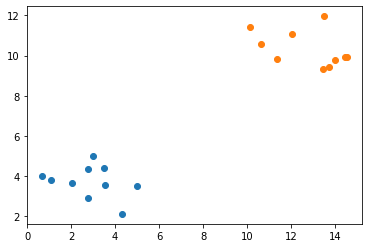

Best solution is [13.40438891  9.93113083  2.90816232  3.83387579]
Fitness of the best solution is 0.03368446790365833
Best solution found after 79 generations


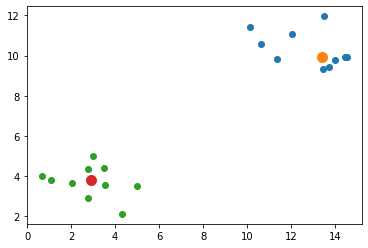

In [1160]:
cluster1_num_samples = 10
cluster1_x1_start = 0
cluster1_x1_end = 5
cluster1_x2_start = 2
cluster1_x2_end = 6
cluster1_x1 = numpy.random.random(size=(cluster1_num_samples))
cluster1_x1 = cluster1_x1 * (cluster1_x1_end - cluster1_x1_start) + cluster1_x1_start
cluster1_x2 = numpy.random.random(size=(cluster1_num_samples))
cluster1_x2 = cluster1_x2 * (cluster1_x2_end - cluster1_x2_start) + cluster1_x2_start

cluster2_num_samples = 10
cluster2_x1_start = 10
cluster2_x1_end = 15
cluster2_x2_start = 8
cluster2_x2_end = 12
cluster2_x1 = numpy.random.random(size=(cluster2_num_samples))
cluster2_x1 = cluster2_x1 * (cluster2_x1_end - cluster2_x1_start) + cluster2_x1_start
cluster2_x2 = numpy.random.random(size=(cluster2_num_samples))
cluster2_x2 = cluster2_x2 * (cluster2_x2_end - cluster2_x2_start) + cluster2_x2_start

c1 = numpy.array([cluster1_x1, cluster1_x2]).T
c2 = numpy.array([cluster2_x1, cluster2_x2]).T

data = numpy.concatenate((c1, c2), axis=0)

matplotlib.pyplot.scatter(cluster1_x1, cluster1_x2)
matplotlib.pyplot.scatter(cluster2_x1, cluster2_x2)
matplotlib.pyplot.show()

def euclidean_distance(X, Y):


    return numpy.sqrt(numpy.sum(numpy.power(X - Y, 2), axis=1))

def cluster_data(solution, solution_idx):

    global num_cluster, data
    feature_vector_length = data.shape[1]
    cluster_centers = [] 
    all_clusters_dists = [] 
    clusters = [] 
    clusters_sum_dist = [] 

    for clust_idx in range(num_clusters):
        cluster_centers.append(solution[feature_vector_length*clust_idx:feature_vector_length*(clust_idx+1)])
        cluster_center_dists = euclidean_distance(data, cluster_centers[clust_idx])
        all_clusters_dists.append(numpy.array(cluster_center_dists))

    cluster_centers = numpy.array(cluster_centers)
    all_clusters_dists = numpy.array(all_clusters_dists)

    cluster_indices = numpy.argmin(all_clusters_dists, axis=0)
    for clust_idx in range(num_clusters):
        clusters.append(numpy.where(cluster_indices == clust_idx)[0])
        if len(clusters[clust_idx]) == 0:
            clusters_sum_dist.append(0)
        else:
            clusters_sum_dist.append(numpy.sum(all_clusters_dists[clust_idx, clusters[clust_idx]]))
    clusters_sum_dist = numpy.array(clusters_sum_dist)

    return cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist

def fitness_func(solution, solution_idx):
    _, _, _, _, clusters_sum_dist = cluster_data(solution, solution_idx)
    fitness = 1.0 / (numpy.sum(clusters_sum_dist) + 0.00000001)

    return fitness

num_clusters = 2
num_genes = num_clusters * data.shape[1]

ga_instance = pygad.GA(num_generations=100,
                       sol_per_pop=10,
                       num_parents_mating=5,
                       init_range_low=-6,
                       init_range_high=20,
                       keep_parents=2,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       suppress_warnings=True)

ga_instance.run()

best_solution, best_solution_fitness, best_solution_idx = ga_instance.best_solution()
print("Best solution is {bs}".format(bs=best_solution))
print("Fitness of the best solution is {bsf}".format(bsf=best_solution_fitness))
print("Best solution found after {gen} generations".format(gen=ga_instance.best_solution_generation))

cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist = cluster_data(best_solution, best_solution_idx)

for cluster_idx in range(num_clusters):
    cluster_x = data[clusters[cluster_idx], 0]
    cluster_y = data[clusters[cluster_idx], 1]
    matplotlib.pyplot.scatter(cluster_x, cluster_y)
    matplotlib.pyplot.scatter(cluster_centers[cluster_idx, 0], cluster_centers[cluster_idx, 1], linewidths=5)
matplotlib.pyplot.show()

# Genetic ALgorithm 2 Implementation

In [1161]:
class Network:
    def __init__(self,input_shape,classes,DNA_param,epochs):
        
        self.architecture_DNA = [] # to save current parameters
        self.fitness = []
        self.acc_history = []
        self.input_shape = input_shape 
        self.classes = classes
        self.epochs = epochs

        
        # unfold DNA_parameters:
        depth = DNA_param[0]
        neurons_per_layer = DNA_param[1]
        activations = DNA_param[2]
        optimizer = DNA_param[3]
        losses = DNA_param[4]
        
        model = Sequential()
        # Building the init network with random choices: 
        network_depth = np.random.choice(depth)
        self.architecture_DNA.append(network_depth)

        for i in range(network_depth):
            if i == 0:
                neurons = np.random.choice(neurons_per_layer)
                activation  = np.random.choice(activations)
                self.architecture_DNA.append([neurons, activation])
                model.add(Dense(neurons,input_shape = (self.input_shape,), activation  = activation))
            if i == network_depth - 1:
                activation  = np.random.choice(activations)
                self.architecture_DNA.append(activation)
                model.add(Dense(self.classes, activation = activation ))
            else:
                neurons = np.random.choice(neurons_per_layer)
                activation  = np.random.choice(activations)
                self.architecture_DNA.append([neurons,activation])
                model.add(Dense(neurons, activation  = activation))
        
        loss=np.random.choice(losses)
        optimizer=np.random.choice(optimizer)
        self.architecture_DNA.append([loss,optimizer])
        model.compile(loss=loss, optimizer= optimizer, metrics=['accuracy'])
        self.model = model

    
    def create_children(self, children_DNA):
        model = Sequential()
      
        
        #print("DNA_length: ", len(children_DNA))
        children_depth = children_DNA[0]
        #print("Depth: ", children_depth)
        #print(children_DNA)
        for i in range(children_depth):
            if i == 0:
                #Input Layer
                model.add(Dense(children_DNA[1][0],input_shape = (self.input_shape,), activation = children_DNA[1][1]))
            if i == children_depth -1:
                model.add(Dense(self.classes, activation = children_DNA[children_depth]))
            else:
                #print(children_DNA[i+1])
                if i != children_depth -1:
                    model.add(Dense(children_DNA[i+1][0], activation = children_DNA[i+1][1]))
        model.compile(loss = children_DNA[-1][0], optimizer = children_DNA[-1][1], metrics=['accuracy'])
        self.model = model
        self.architecture_DNA = children_DNA
        
        
    def give_fitness(self):
        return self.fitness
    
        
    def train(self):
        #start = time.time()
        self.model.fit(X_train,y_train, batch_size = 32, epochs = self.epochs, verbose = 1,shuffle = True) #, validation_data =(X_test, y_test)
        #end = time.time()
        #self.fitness[0] = end-start
 
    def test(self):
        loss, acc = self.model.evaluate(X_test,y_test)
        self.fitness = acc
        self.acc_history.append(acc)
    
    def give_DNA(self):
        return self.architecture_DNA
    
    def architecture(self):
        self.model.summary()

In [1162]:
class GeneticAlgorithm:
    def __init__(self, population_size, mutation_rate, generations = 50, Epochs = 2):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.training_epochs = Epochs
        self.population = None
        self.children_population_DNA = []
        self.acces = []
        self.norm_acces = []
        
    def create_population(self):
        self.population = [Network(image_vector_size, num_classes, DNA_parameter,self.training_epochs) for i in range(self.population_size)]
    
    def train_generation(self):
        for member in self.population:
                member.train()
                
    def predict(self):
        for member in self.population:
                member.test()
                self.acc.append(member.give_fitness())
    
    def normalize(self):
        sum_ = sum(self.acc)
        self.norm_acc = [i/sum_ for i in self.acc] 
        #print("\nNormalization sum: ",sum(self.norm_acc))
        #assert sum(self.norm_acc) == 1
        
    def clear_losses(self):
        self.norm_acc = []
        self.acc = []
        
    def mutate(self):
        for child_DNA in self.children_population_DNA:
            for i in range(len(child_DNA)):
                if np.random.random() < self.mutation_rate:
                    print("\nMutation!")
                    if i == 0:
                        new_depth = np.random.choice(DNA_parameter[0])
                        child_DNA[0] = new_depth
                    
                    if i == len(child_DNA)-2:
                        new_output_activation = np.random.choice(DNA_parameter[2])
                        child_DNA[-2] = new_output_activation
                    
                    if i == len(child_DNA)-1:
                        # random flip if loss or activation shall be changed
                        if np.random.random() < 0.5:
                            new_loss = np.random.choice(DNA_parameter[4])
                            child_DNA[-1][0] = new_loss
                        else:
                            new_optimizer = np.random.choice(DNA_parameter[3])
                            child_DNA[-1][1] = new_optimizer
                    if i != 0 and i !=len(child_DNA)-2 and i != len(child_DNA)-1:
                    #else:
                        # 3/2 flif if number of neurons or activation function mutates:
                        #print(child_DNA)
                        if np.random.random() < 0.33:
                            #print(child_DNA[i][1])
                            new_activation = np.random.choice(DNA_parameter[2])
                            #print(new_activation)
                            child_DNA[i][1] = new_activation
                        else:
                            #print(child_DNA[i][0])
                            new_neuron_count = np.random.choice(DNA_parameter[1])
                            child_DNA[i][0] = new_neuron_count
                            #print(new_neuron_count)
                    #print("After mutation ", child_DNA)

    def reproduction(self):
        """ 
        Reproduction through midpoint crossover method 
        """
        population_idx = [i for i in range(len(self.population))]
        for i in range(len(self.population)):
        #selects two parents probabilistic accroding to the fitness score
            if sum(self.norm_acc) != 0:
                parent1 = np.random.choice(population_idx, p = self.norm_acc)
                parent2 = np.random.choice(population_idx, p = self.norm_acc)
            else:
              # if there are no "best" parents choose randomly 
                parent1 = np.random.choice(population_idx)
                parent2 = np.random.choice(population_idx)

            # picking random midpoint for crossing over name/DNA
            parent1_DNA = self.population[parent1].give_DNA()
            parent2_DNA = self.population[parent2].give_DNA()
            #print(parent1_DNA)
            
            mid_point_1 = np.random.choice([i for i in range(2,len(parent1_DNA)-2)])
            mid_point_2 = np.random.choice([i for i in range(2,len(parent2_DNA)-2)])
            # adding DNA-Sequences of the parents to final DNA
            child_DNA = parent1_DNA[:mid_point_1] + parent2_DNA[mid_point_2:]
            new_nn_depth = len(child_DNA)-2 # minus 2 because of depth parameter[0] and loss parameter[-1]
            child_DNA[0] = new_nn_depth
            self.children_population_DNA.append(child_DNA)
        # old population gets the new and proper weights
        self.mutate()
        keras.backend.clear_session() ## delete old models to free memory
        for i in range(len(self.population)):
            self.population[i].create_children(self.children_population_DNA[i])
        
        
    
    def run_evolution(self):
        for episode in range(self.generations):
            print("\n--- Generation {} ---".format(episode))
            self.clear_losses()
            self.train_generation()
            self.predict()
            if episode != self.generations -1:
                self.normalize()
                self.reproduction()
                
            else:
                pass
            self.children_population_DNA = []
        # plotting history:
        for a in range(self.generations):
            for member in self.population:
                plt.plot(member.acc_history)
        plt.xlabel("Generations")
        plt.ylabel("Accuracy")
        plt.show()

In [1163]:
GA = GeneticAlgorithm(population_size = 4,mutation_rate = 0.03, generations = 6,Epochs=1)
GA.create_population()

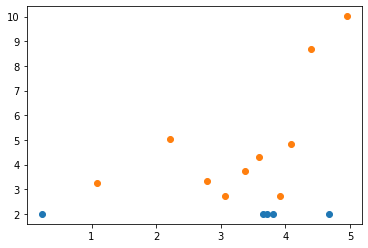

Best solution is [3.25891635 2.92588743 4.68911163 9.35947154]
Fitness of the best solution is 0.05039468436323081
Best solution found after 98 generations


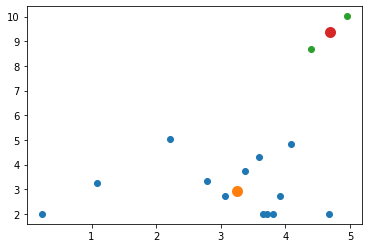

In [1164]:
cluster1_num_samples = 5
cluster1_x1_start = 0
cluster1_x1_end = 5
cluster1_x2_start = 2
cluster1_x2_end = 2
cluster1_x1 = numpy.random.random(size=(cluster1_num_samples))
cluster1_x1 = cluster1_x1 * (cluster1_x1_end - cluster1_x1_start) + cluster1_x1_start
cluster1_x2 = numpy.random.random(size=(cluster1_num_samples))
cluster1_x2 = cluster1_x2 * (cluster1_x2_end - cluster1_x2_start) + cluster1_x2_start

cluster2_num_samples = 10
cluster2_x1_start = 1
cluster2_x1_end = 5
cluster2_x2_start = 2
cluster2_x2_end = 12
cluster2_x1 = numpy.random.random(size=(cluster2_num_samples))
cluster2_x1 = cluster2_x1 * (cluster2_x1_end - cluster2_x1_start) + cluster2_x1_start
cluster2_x2 = numpy.random.random(size=(cluster2_num_samples))
cluster2_x2 = cluster2_x2 * (cluster2_x2_end - cluster2_x2_start) + cluster2_x2_start

c1 = numpy.array([cluster1_x1, cluster1_x2]).T
c2 = numpy.array([cluster2_x1, cluster2_x2]).T

data = numpy.concatenate((c1, c2), axis=0)

matplotlib.pyplot.scatter(cluster1_x1, cluster1_x2)
matplotlib.pyplot.scatter(cluster2_x1, cluster2_x2)
matplotlib.pyplot.show()

def euclidean_distance(X, Y):


    return numpy.sqrt(numpy.sum(numpy.power(X - Y, 2), axis=1))

def cluster_data(solution, solution_idx):

    global num_cluster, data
    feature_vector_length = data.shape[1]
    cluster_centers = [] 
    all_clusters_dists = [] 
    clusters = [] 
    clusters_sum_dist = [] 

    for clust_idx in range(num_clusters):
        cluster_centers.append(solution[feature_vector_length*clust_idx:feature_vector_length*(clust_idx+1)])
        cluster_center_dists = euclidean_distance(data, cluster_centers[clust_idx])
        all_clusters_dists.append(numpy.array(cluster_center_dists))

    cluster_centers = numpy.array(cluster_centers)
    all_clusters_dists = numpy.array(all_clusters_dists)

    cluster_indices = numpy.argmin(all_clusters_dists, axis=0)
    for clust_idx in range(num_clusters):
        clusters.append(numpy.where(cluster_indices == clust_idx)[0])
        if len(clusters[clust_idx]) == 0:
            clusters_sum_dist.append(0)
        else:
            clusters_sum_dist.append(numpy.sum(all_clusters_dists[clust_idx, clusters[clust_idx]]))
    clusters_sum_dist = numpy.array(clusters_sum_dist)

    return cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist

def fitness_func(solution, solution_idx):
    _, _, _, _, clusters_sum_dist = cluster_data(solution, solution_idx)
    fitness = 1.0 / (numpy.sum(clusters_sum_dist) + 0.00000001)

    return fitness

num_clusters = 2
num_genes = num_clusters * data.shape[1]

ga_instance = pygad.GA(num_generations=100,
                       sol_per_pop=10,
                       num_parents_mating=5,
                       init_range_low=-6,
                       init_range_high=20,
                       keep_parents=2,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       suppress_warnings=True)

ga_instance.run()

best_solution, best_solution_fitness, best_solution_idx = ga_instance.best_solution()
print("Best solution is {bs}".format(bs=best_solution))
print("Fitness of the best solution is {bsf}".format(bsf=best_solution_fitness))
print("Best solution found after {gen} generations".format(gen=ga_instance.best_solution_generation))

cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist = cluster_data(best_solution, best_solution_idx)

for cluster_idx in range(num_clusters):
    cluster_x = data[clusters[cluster_idx], 0]
    cluster_y = data[clusters[cluster_idx], 1]
    matplotlib.pyplot.scatter(cluster_x, cluster_y)
    matplotlib.pyplot.scatter(cluster_centers[cluster_idx, 0], cluster_centers[cluster_idx, 1], linewidths=5)
matplotlib.pyplot.show()